# Cat Dog Classification

## 1. 下载数据
我们将使用包含猫与狗图片的数据集。它是Kaggle.com在2013年底计算机视觉竞赛提供的数据集的一部分，当时卷积神经网络还不是主流。可以在以下位置下载原始数据集: `https://www.kaggle.com/c/dogs-vs-cats/data`。

图片是中等分辨率的彩色JPEG。看起来像这样：

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

不出所料，2013年的猫狗大战的Kaggle比赛是由使用卷积神经网络的参赛者赢得的。最佳成绩达到了高达95％的准确率。在本例中，我们将非常接近这个准确率，即使我们将使用不到10％的训练集数据来训练我们的模型。

原始数据集的训练集包含25,000张狗和猫的图像（每个类别12,500张），543MB大（压缩）。

在下载并解压缩之后，我们将创建一个包含三个子集的新数据集：
* 每个类有1000个样本的训练集，
* 每个类500个样本的验证集，
* 最后是每个类500个样本的测试集。

数据已经提前处理好。

### 1.1 加载数据集目录

In [1]:
import os, shutil

# The directory where we will
# store our smaller dataset
base_dir = './data/cats_and_dogs_small'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')

## 2. 模型一

### 2.1 数据处理

In [2]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 150*150
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Using TensorFlow backend.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
print('train_dir: ',train_dir)
print('validation_dir: ',validation_dir)
print('test_dir: ',test_dir)

train_dir:  ./data/cats_and_dogs_small\train
validation_dir:  ./data/cats_and_dogs_small\validation
test_dir:  ./data/cats_and_dogs_small\test


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
labels_batch

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1.], dtype=float32)

### 2.2 构建模型

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [7]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [8]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6890 - acc: 0.5355 - val_loss: 0.6743 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6409 - acc: 0.6290 - val_loss: 0.6164 - val_acc: 0.6640
Epoch 3/30
100/100 [==============================] - 17s 167ms/step - loss: 0.5900 - acc: 0.6775 - val_loss: 0.6072 - val_acc: 0.6590
Epoch 4/30
100/100 [==============================] - 13s 134ms/step - loss: 0.5550 - acc: 0.7195 - val_loss: 0.5842 - val_acc: 0.6910cc: 0.719
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5286 - acc: 0.7340 - val_loss: 0.5821 - val_acc: 0.6830
Epoch 6/30
100/100 [==============================] - 13s 130ms/step - loss: 0.5004 - acc: 0.7505 - val_loss: 0.5822 - val_acc: 0.6820
Epoch 7/30
100/100 [==============================] - 13s 129ms/step - loss: 0.4684 - acc: 0.7805 - val_loss: 0.5563 - val_acc: 0.7120
Epoch 8/30
100/100 [==========================

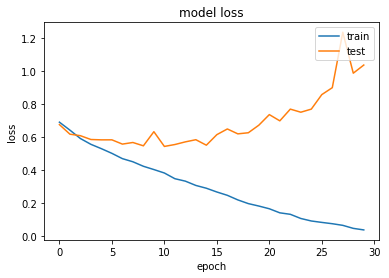

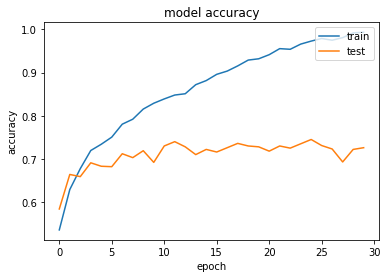

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
val_loss_min = history.history['val_loss'].index(min(history.history['val_loss']))
val_acc_max = history.history['val_acc'].index(max(history.history['val_acc']))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

validation set min loss:  10
validation set max accuracy:  24


In [30]:
from keras import layers
from keras import models

# vgg的做法
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', padding="same", input_shape=(64, 64, 3)))
model.add(layers.Conv2D(32, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(256, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [32]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# model.compile(loss='binary_crossentropy', 
#               optimizer='adam', 
#               metrics=['accuracy'])

### 2.3 训练模型

In [33]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 10s 95ms/step - loss: 0.6936 - acc: 0.4975 - val_loss: 0.6927 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 7s 74ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.6928 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 7s 75ms/step - loss: 0.6898 - acc: 0.5325 - val_loss: 0.6755 - val_acc: 0.5970
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6805 - acc: 0.5635 - val_loss: 0.6590 - val_acc: 0.6000
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6634 - acc: 0.6125 - val_loss: 0.6405 - val_acc: 0.6370
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6389 - acc: 0.6305 - val_loss: 0.6188 - val_acc: 0.6550
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.6095 - acc: 0.6690 - val_loss: 0.5825 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 8s 77ms/step -

### 2.4 画出表现

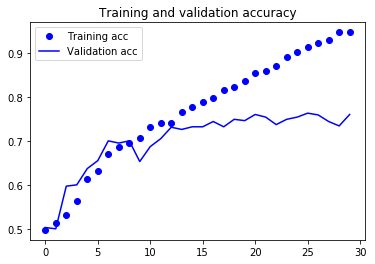

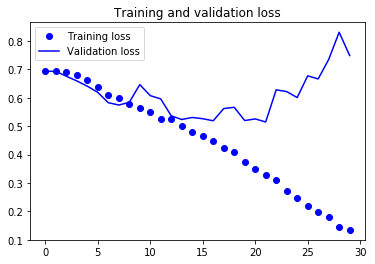

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
val_loss_min = val_loss.index(min(val_loss))
val_acc_max = val_acc.index(max(val_acc))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

validation set min loss:  21
validation set max accuracy:  25


### 2.5 测试集表现

In [37]:
scores = model.evaluate_generator(test_generator, verbose=0)
print("Large CNN Error: %.2f%%" % (100 - scores[1] * 100))

Large CNN Error: 26.80%


## 3. 模型二 使用数据增强来防止过拟合

### 3.1 数据增强示例

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,    # 角度值（在 0~180 范围内），表示图像随机旋转的角度范围
      width_shift_range=0.2,    # 图像在水平或垂直方向上平移的范围
      height_shift_range=0.2,    # （相对于总宽度或总高度的比例）
      shear_range=0.2,    # 随机错切变换的角度
      zoom_range=0.2,    # 图像随机缩放的范围
      horizontal_flip=True,    # 随机将一半图像水平翻转
      fill_mode='nearest')    # 用于填充新创建像素的方法，
                              # 这些新像素可能来自于旋转或宽度/高度平移

In [ ]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

imgplot_oringe = plt.imshow(img)

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### 3.2 定义数据增强

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)    # 注意，不能增强验证数据

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

### 3.3 训练网络

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation='relu', padding="same", input_shape=(150, 150, 3)))
model.add(layers.Conv2D(32, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(64, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(128, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, 3, activation='relu', padding="same"))
model.add(layers.Conv2D(256, 3, activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
#               loss='binary_crossentropy',
#               metrics=['acc'])

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,    # 训练集分成100批送进去，相当于每批送20个
                              epochs=100,    # 循环100遍
                              validation_data=validation_generator,
                              validation_steps=50,    # 验证集分50批送进去，每批20个
                              verbose=0)

### 3.4 画出表现

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
val_loss_min = val_loss.index(min(val_loss))
val_acc_max = val_acc.index(max(val_acc))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

In [ ]:
# train_datagen = ImageDataGenerator(rotation_range=40,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True,
#                                    fill_mode='nearest')


# train_datagen.fit(train_X)
# train_generator = train_datagen.flow(train_X, train_y, 
#                                      batch_size = 64)

In [ ]:
# history = model_vgg16.fit_generator(train_generator, 
#                                     validation_data = (test_X, test_y), 
#                                     steps_per_epoch = train_X.shape[0] / 100, 
#                                     epochs = 10)

## 4. 使用预训练的VGG-16

![swapping FC classifiers](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

In [38]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,    # 不要分类层
                  input_shape=(150, 150, 3))

In [39]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [40]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(256, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [42]:
conv_base.trainable = False

In [43]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [44]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/30
 - 53s - loss: 0.5863 - acc: 0.6990 - val_loss: 0.4363 - val_acc: 0.8500
Epoch 2/30
 - 50s - loss: 0.4633 - acc: 0.7980 - val_loss: 0.3560 - val_acc: 0.8700
Epoch 3/30
 - 50s - loss: 0.4333 - acc: 0.8100 - val_loss: 0.3234 - val_acc: 0.8810
Epoch 4/30
 - 50s - loss: 0.4006 - acc: 0.8205 - val_loss: 0.3094 - val_acc: 0.8730
Epoch 5/30
 - 50s - loss: 0.3862 - acc: 0.8340 - val_loss: 0.2931 - val_acc: 0.8830
Epoch 6/30
 - 50s - loss: 0.3645 - acc: 0.8430 - val_loss: 0.2816 - val_acc: 0.8890
Epoch 7/30
 - 50s - loss: 0.3560 - acc: 0.8405 - val_loss: 0.2764 - val_acc: 0.8880
Epoch 8/30
 - 50s - loss: 0.3450 - acc: 0.8460 - val_loss: 0.2675 - val_acc: 0.8990
Epoch 9/30
 - 50s - loss: 0.3500 - acc: 0.8370 - val_loss: 0.2641 - val_acc: 0.8960
Epoch 10/30
 - 50s - loss: 0.3402 - acc: 0.8515 - val_loss: 0.2661 - val_acc: 0.8920
Epoch 11/30
 - 50s - loss: 0.3302 - acc: 0.8610 - val_loss: 0.2608 - val_acc: 0.8930
Epoch 12/30
 - 50s - loss: 0.3248 - acc: 0.8570 - val_loss: 0.2545 - val_a

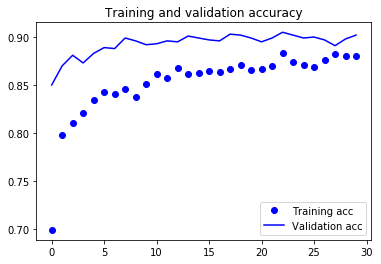

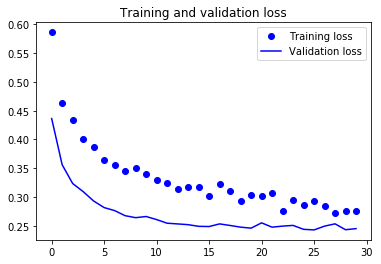

In [46]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [47]:
val_loss_min = val_loss.index(min(val_loss))
val_acc_max = val_acc.index(max(val_acc))
print('validation set min loss: ', val_loss_min)
print('validation set max accuracy: ', val_acc_max)

validation set min loss:  25
validation set max accuracy:  22


## Fine-tuning

![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

In [48]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [49]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
              loss='binary_crossentropy',              
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50,
                              verbose=0)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
smooth_val_loss = smooth_curve(val_loss)
smooth_val_loss.index(min(smooth_val_loss))

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

In [ ]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper right')
# plt.show()